## Linear Regression with Gradient Descent

There is a dataset of $N$ samples $\{x_i, y_i\}_{i=1}^N$.

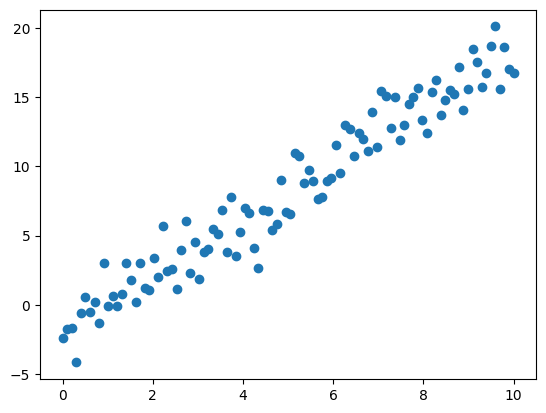

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.linspace(0, 10, N)
w = 2
b = 1.5 * np.random.randn(N) - 2
y = w * x + b

plt.scatter(x, y)
plt.show()

We want to model the relationship between $x$ and $y$ with a linear function $f$.
$f$ is parameterized by $\theta$:

$$
y = f(x; \theta) = \theta_0x + \theta_1
$$

In [2]:
def linear_model(x, theta):
    return x * theta[0] + theta[1]

In [3]:
# if x = 1, theta = (3, 1), then y = 3x + 1 = 4
linear_model(1, (3, 1))

4

First, initialize the parameters $\theta$ randomly.
Let's check whether the model fits the data enough.

In [4]:
def plot_model(x, y, theta):
    plt.scatter(x, y)
    plt.plot(x, linear_model(x, theta), color='red')
    plt.show()

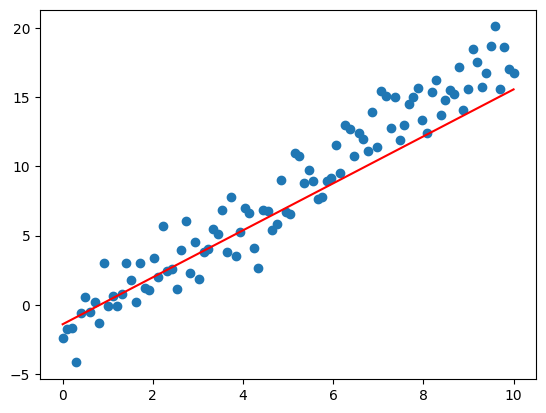

In [5]:
theta = np.random.randn(2, 1)
plot_model(x, y, theta)

How can we measure the fitness of the model? We can use the mean squared error (MSE):

$$
L(x, y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\theta_0x_i + \theta_1))^2
$$

In [6]:
def loss_func(y, y_hat):
    return np.mean((y - y_hat)**2)

y_hat = linear_model(x, theta)
loss_func(y, y_hat)

4.4317864881110145

The loss is too high. We need to update the parameters $\theta$ to reduce the loss. We can use gradient descent to update the parameters $\theta$:

$$
\theta \leftarrow \theta - \alpha \nabla_\theta L
$$

where $\nabla_\theta L$ is the gradient vector of the loss function $L$ with respect to $\theta$ and  $\alpha$ is the learning rate.

Gradient vector of linear model is:

$$
\theta = [\theta_0, \theta_1]
$$

$$
\nabla_\theta L = \Big[\frac{\partial L}{\partial \theta_0}, \frac{\partial L}{\partial \theta_1} \Big]
$$



$$
\frac{\partial L}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^{n} -x_i(y_i - (\theta_0x_i + \theta_1))
$$

$$
\frac{\partial L}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^{n} -(y_i - (\theta_0x_i + \theta_1))
$$

In [7]:
def gradient_descent(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

In [8]:
def linear_model_grad(x, y, theta):
    y_hat = linear_model(x, theta)
    dtheta = np.zeros_like(theta)
    dtheta[0] = -2 * np.mean((y - y_hat) * x)
    dtheta[1] = -2 * np.mean(y - y_hat)
    return dtheta

In [9]:
linear_model_grad(x, y, theta)

array([[-16.99522849],
       [ -2.24999544]])

loss: 4.4317864881110145


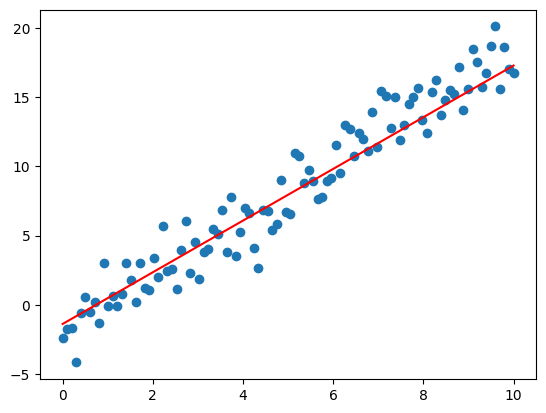

loss: 2.499184441769898


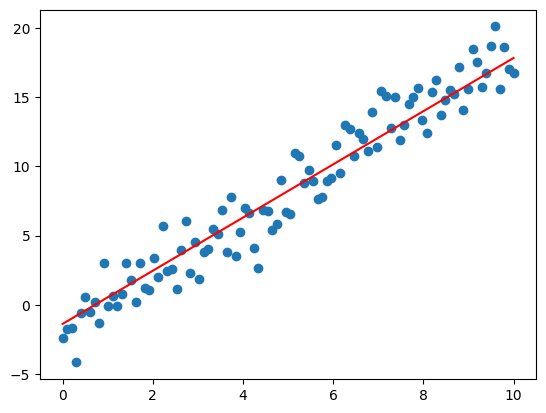

loss: 2.3066962265845055


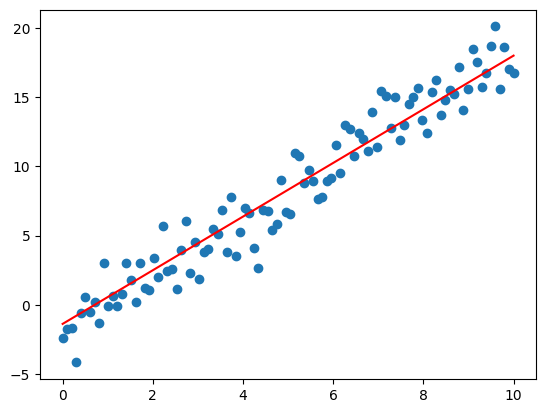

loss: 2.2868024451965003


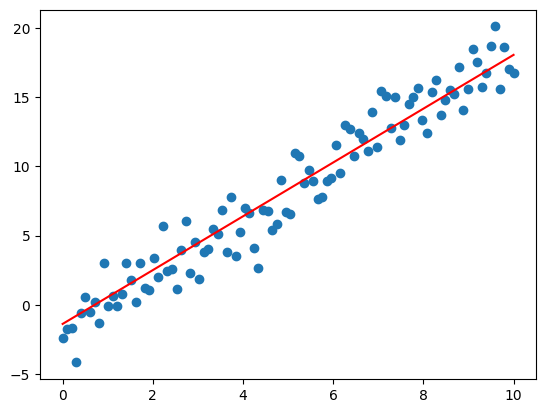

loss: 2.28403471810529


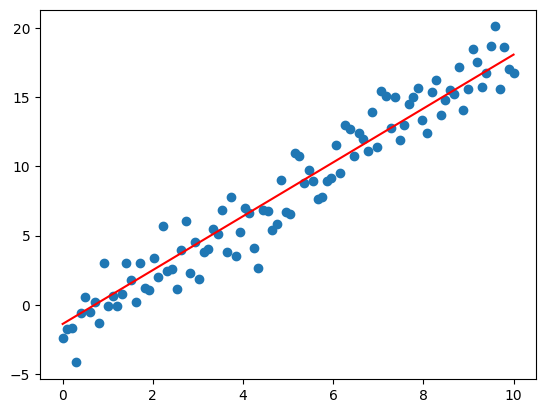

loss: 2.2829734415141236


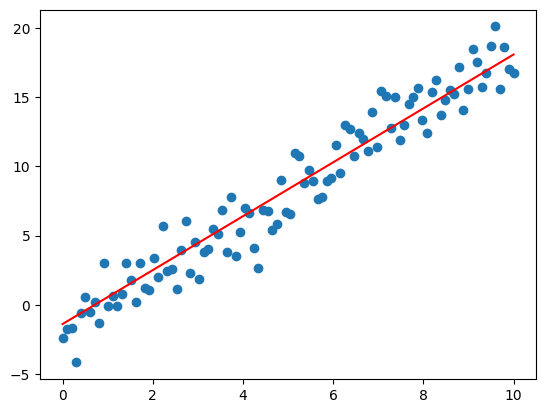

loss: 2.2820892042032663


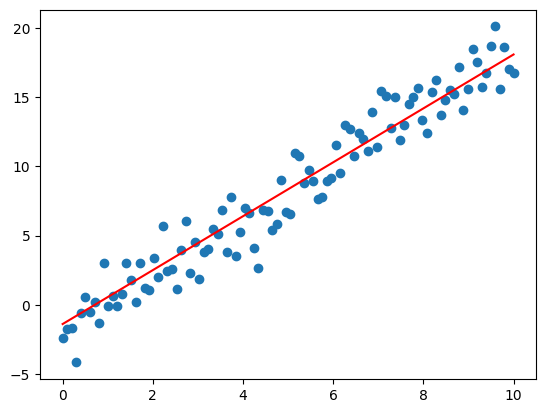

loss: 2.281230240320613


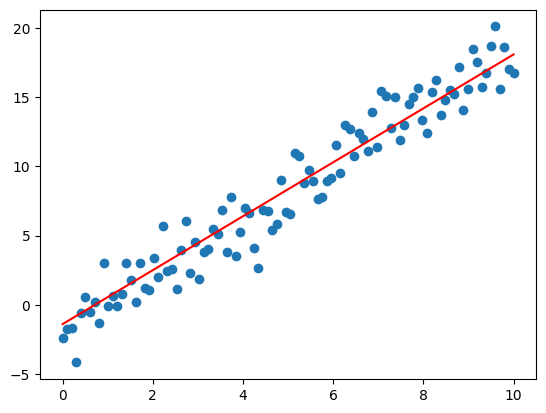

loss: 2.2803814211628697


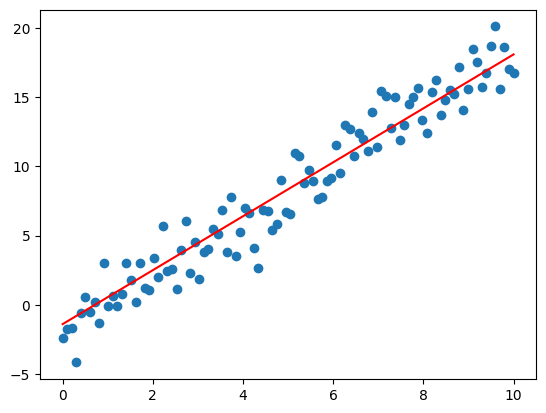

loss: 2.2795411706062314


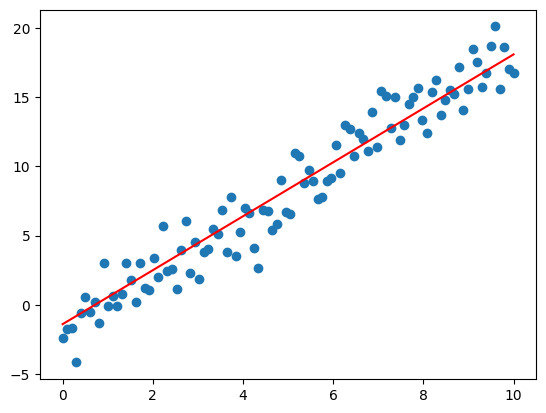

loss: 2.2787092574357612


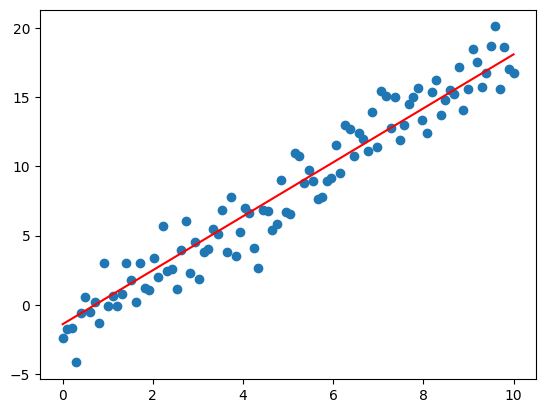

loss: 2.277885584567756


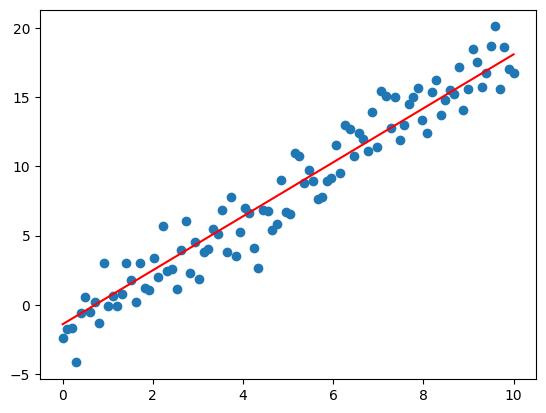

loss: 2.277070068956145


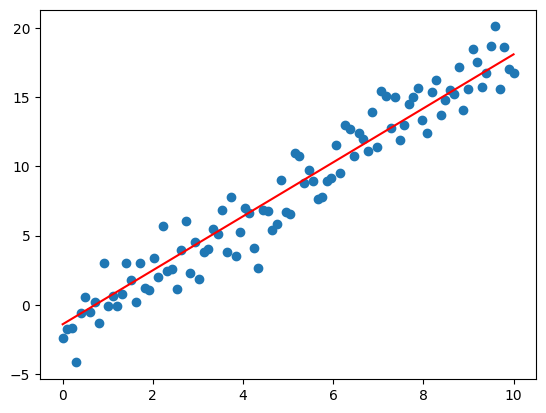

loss: 2.2762626296741963


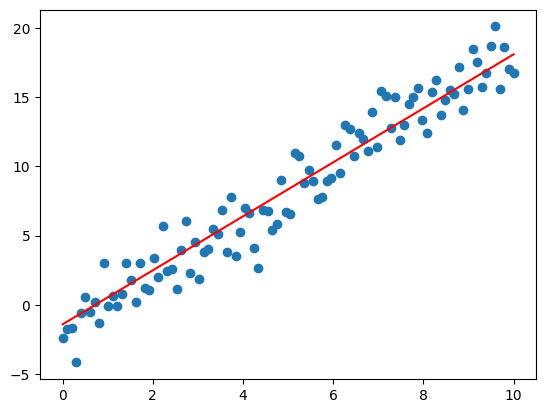

loss: 2.275463186725253


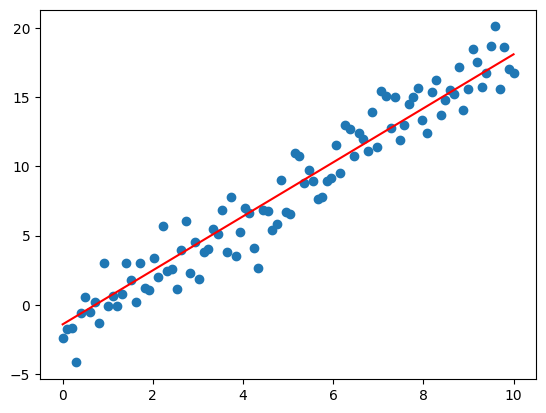

loss: 2.2746716609176483


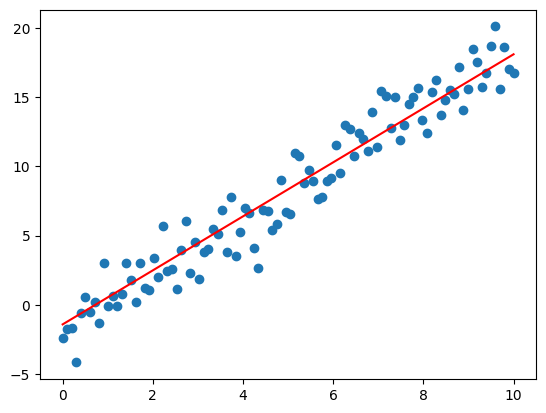

loss: 2.2738879738452393


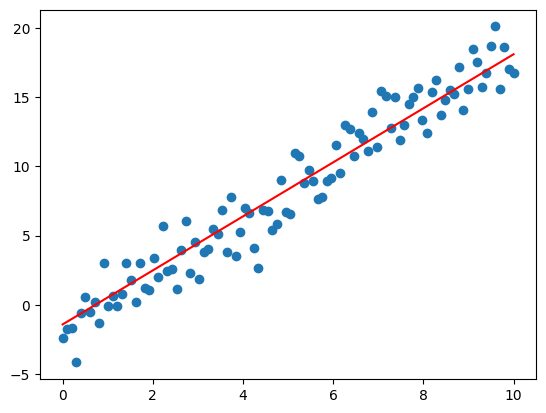

loss: 2.2731120478784903


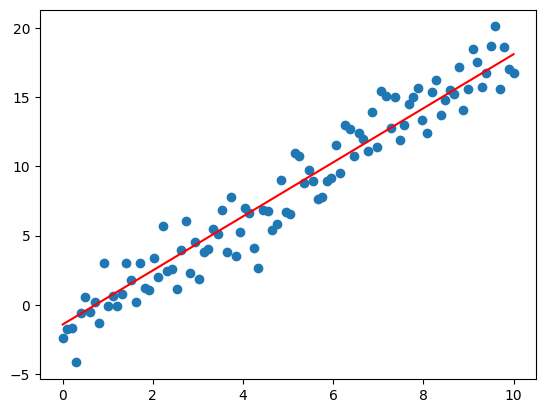

loss: 2.2723438061566714


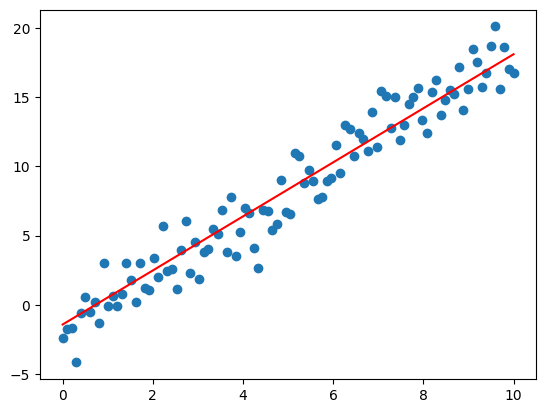

loss: 2.271583172580227


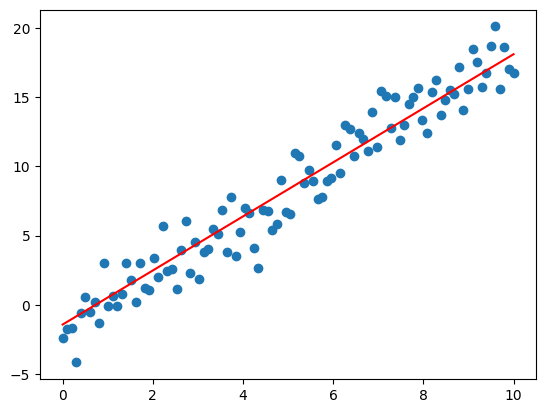

loss: 2.2708300718032417


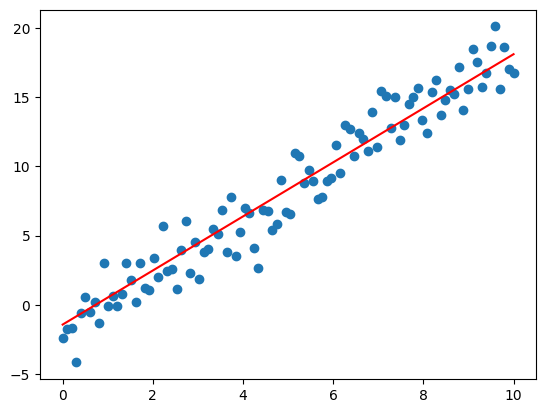

loss: 2.2700844292259754


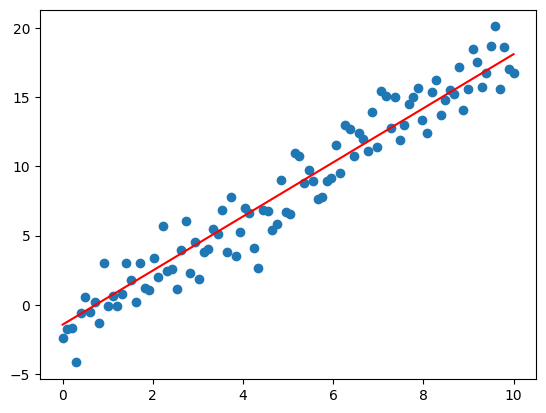

loss: 2.26934617098747


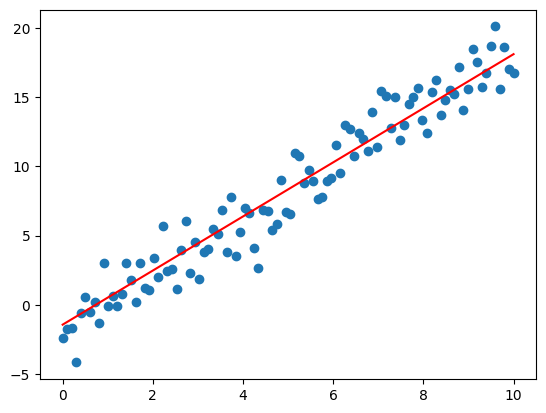

loss: 2.2686152239582413


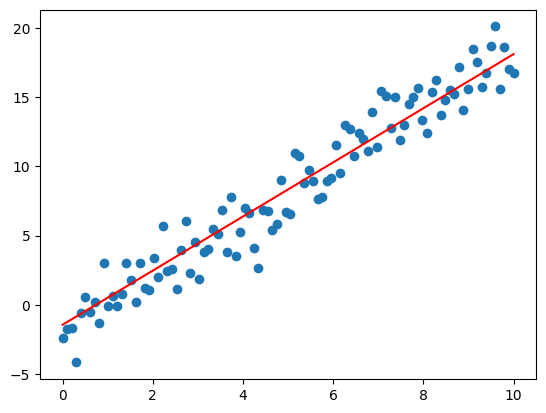

loss: 2.2678915157330266


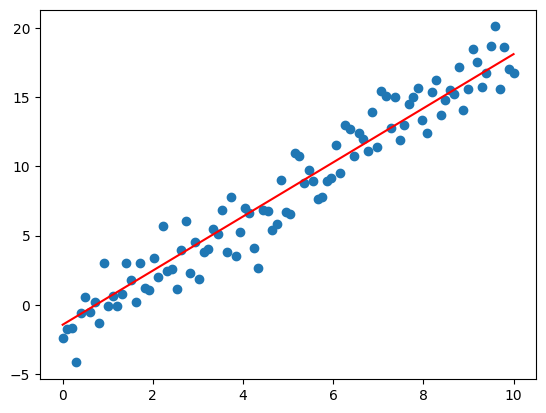

loss: 2.2671749746236163


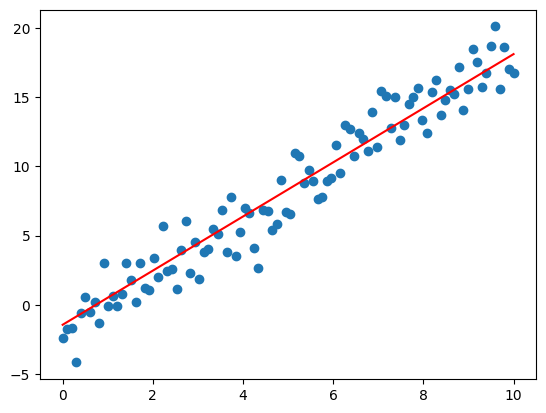

loss: 2.2664655296517524


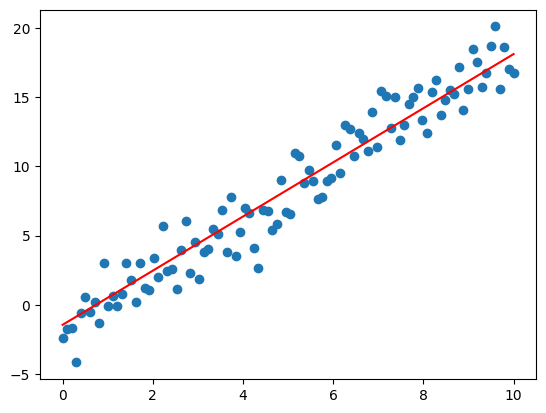

loss: 2.2657631105420997


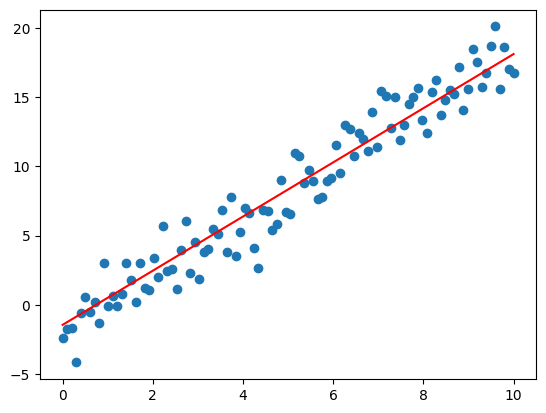

loss: 2.265067647715279


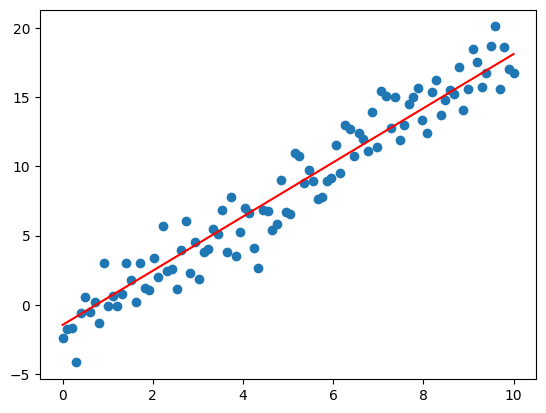

loss: 2.264379072280978


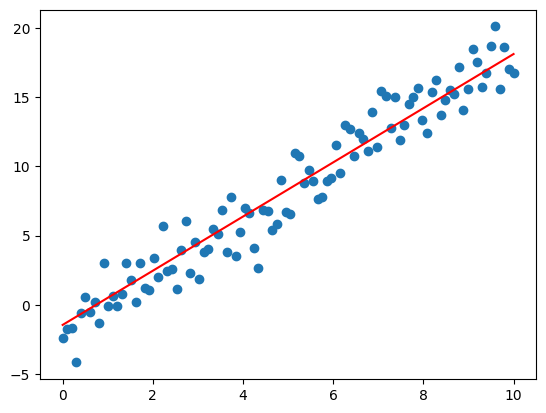

loss: 2.2636973160311307


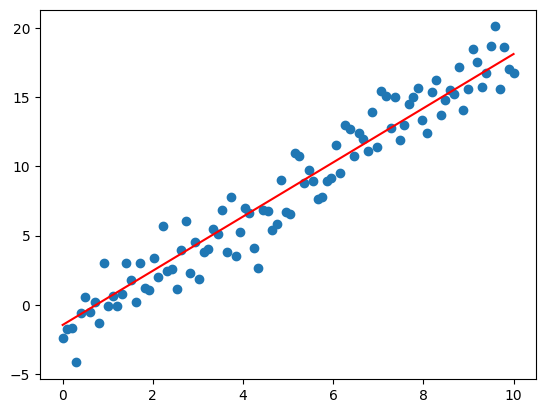

loss: 2.263022311433154


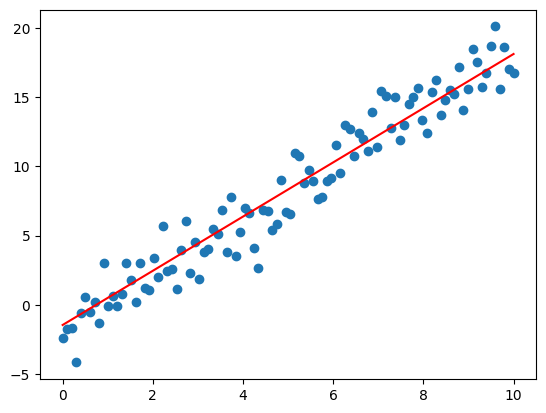

loss: 2.262353991623266


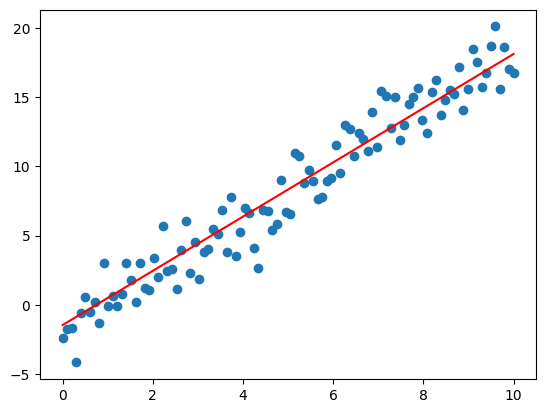

loss: 2.2616922903998535


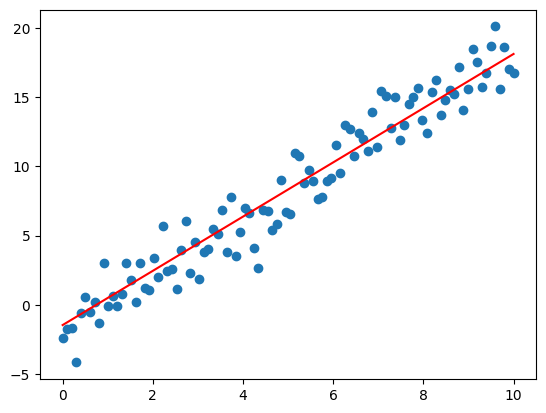

loss: 2.261037142216922


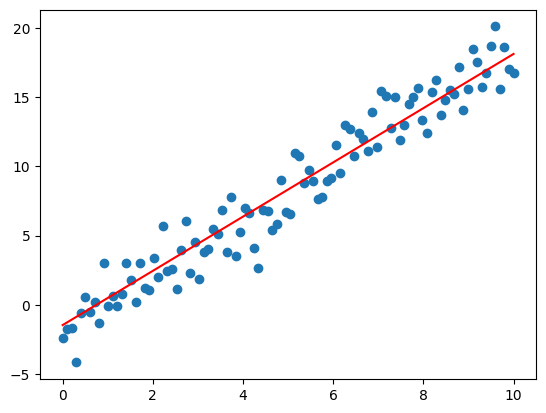

loss: 2.2603884821775995


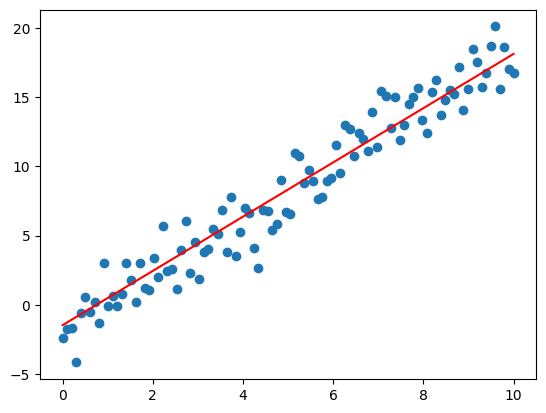

loss: 2.2597462460277096


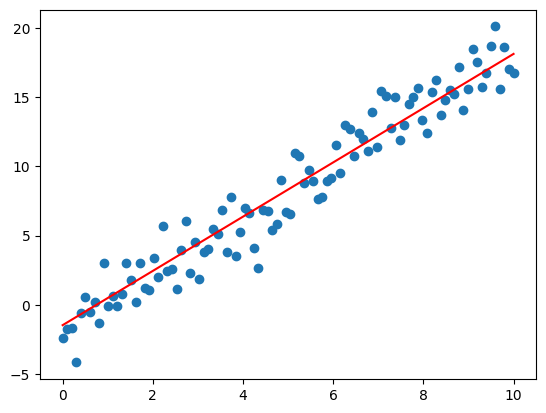

loss: 2.2591103701494033


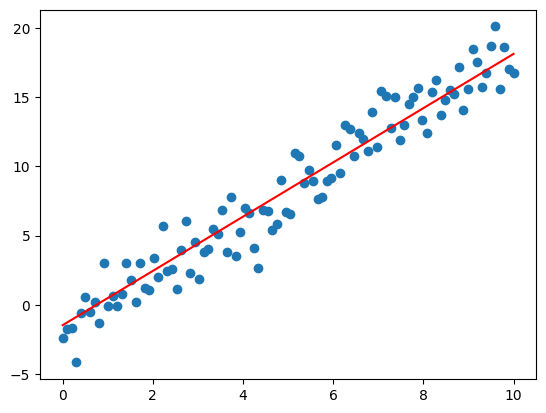

loss: 2.258480791554863


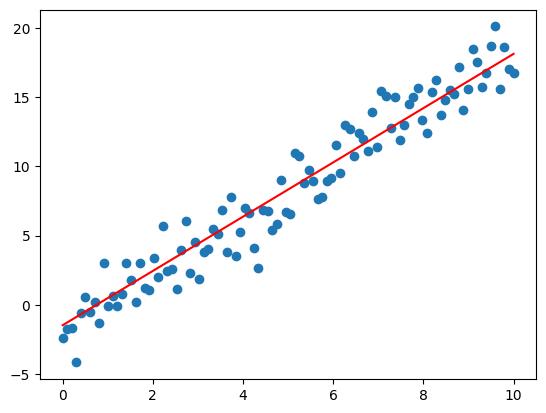

loss: 2.2578574478800566


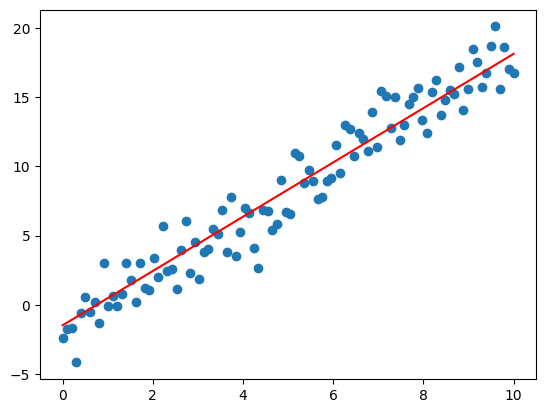

loss: 2.2572402773785645


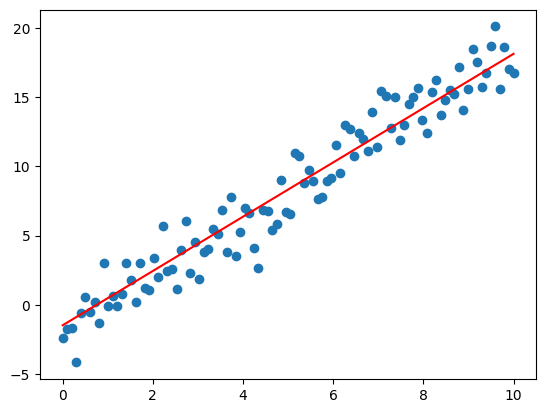

loss: 2.2566292189154624


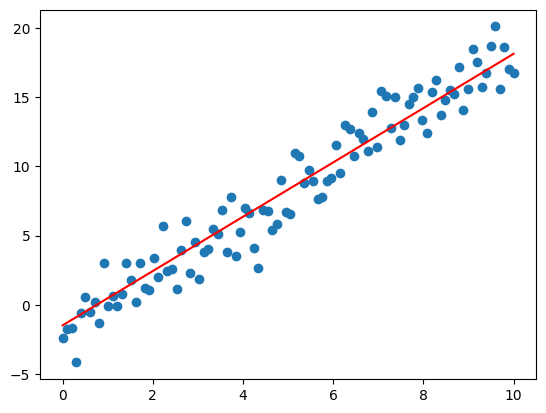

loss: 2.2560242119612637


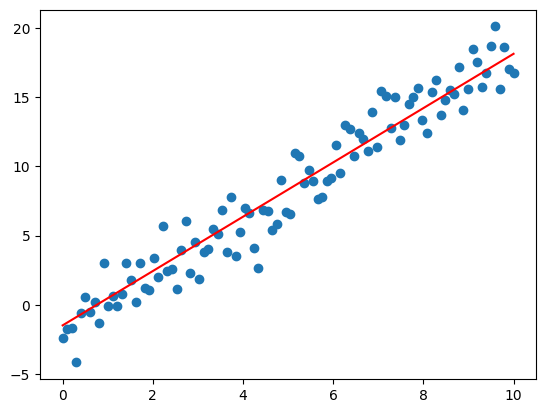

loss: 2.2554251965859264


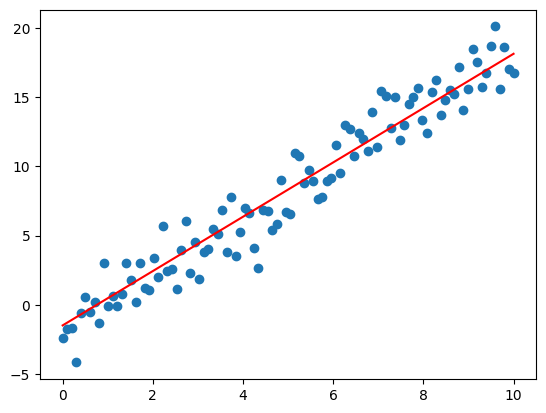

loss: 2.2548321134529123


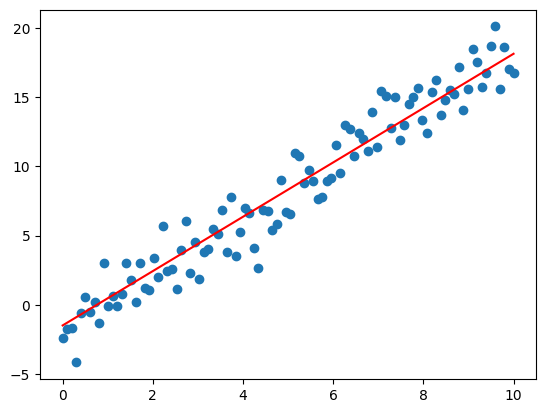

loss: 2.2542449038133143


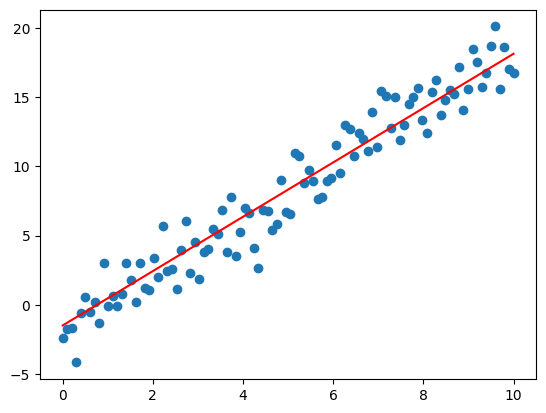

loss: 2.2536635095000355


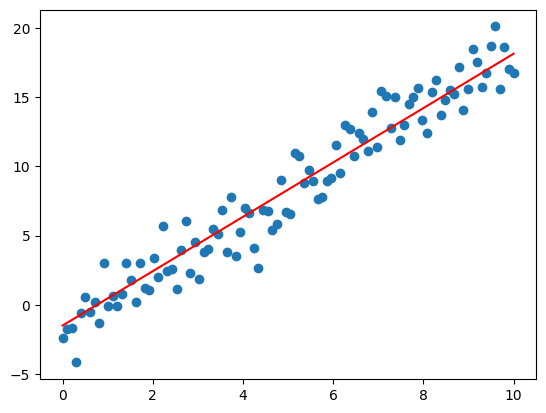

loss: 2.253087872922023


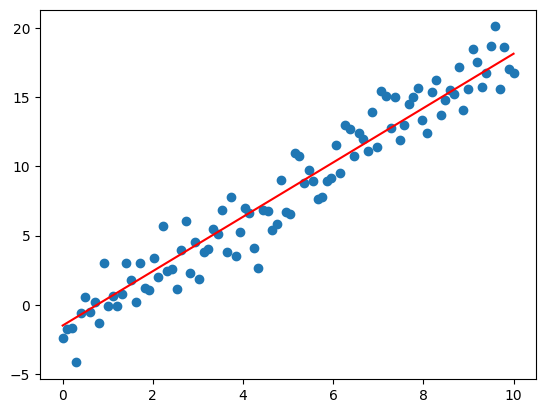

loss: 2.2525179370585704


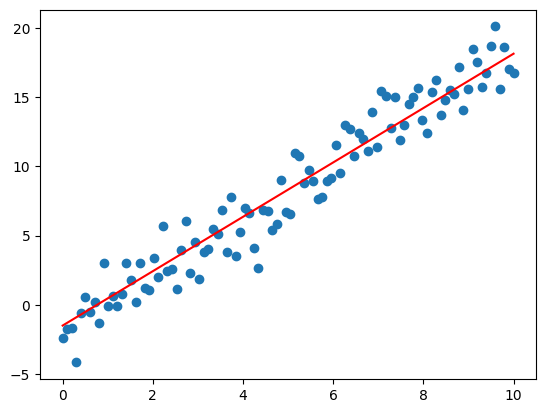

loss: 2.2519536454536624


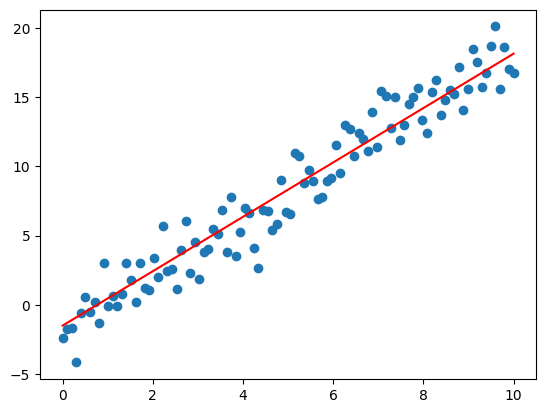

loss: 2.251394942210389


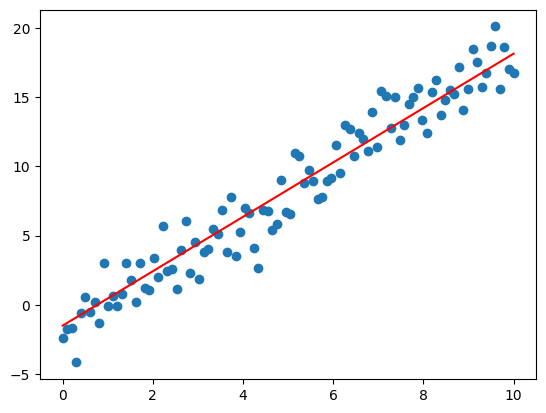

In [10]:
for i in range(51):
    loss = loss_func(y, linear_model(x, theta))
    theta_grad = linear_model_grad(x, y, theta)
    theta = gradient_descent(theta, theta_grad, 0.01)
    print(f"loss: {loss}")
    plot_model(x, y, theta)